## Weight  of evidence

**Weight of Evidence (WoE)** was developed primarily for the **credit and financial industries** to help **build more predictive models** to evaluate the **risk of loan default**. That is, to predict how likely the money lent to a person or institution is to be lost. Thus, Weight of Evidence is a **measure of the "strength” of a grouping technique to separate good and bad risk** (default). 

**WoE** will be 0 if the **P(Goods) / P(Bads) = 1**, that is, if the outcome is random for that group. If **P(Bads) > P(Goods)** the odds ratio will be < 1 and, WoE will be < 0 if,  P(Goods) > P(Bads).

**WoE is well suited for Logistic Regression**, because the Logit transformation is simply the log of the odds, i.e., ln(P(Goods)/P(Bads)). Therefore, by using **WoE-coded predictors** in logistic regression, the predictors are all prepared and coded to the same scale, and the parameters in the linear logistic regression equation can be directly compared.

The WoE transformation has three advantages:

- It creates a **monotonic relationship between the target and the independent variables**.
- It **orders the categories on a "logistic" scale** which is natural for logistic regression
- The **transformed variables can then be compared** because they are on the same scale. Therefore, it is possible to determine which one is more predictive. **The WoE's limitation: Prone to cause over-fitting!

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.encoding import WoEEncoder as fe_WoEEncoder
from category_encoders.woe import WOEEncoder

In [153]:
data = pd.read_csv(
    'titanic.csv', usecols=['cabin', 'sex', 'embarked', 'survived'])
data.head()

,survived,sex,cabin,embarked
0,1,female,B5,S
1,1,male,C22,S
2,0,female,C22,S
3,0,male,C22,S
4,0,female,C22,S


**Remove observations with na in embarked!**

In [154]:
data.dropna(subset=['embarked'], inplace=True)
data.shape

(1307, 4)

**Extract the first letter of the cabin to create a simpler variable!**

In [155]:
data['cabin'] = data['cabin'].astype(str).str[0]

Remove the observations **where cabin = T** because **only few observations** show T in the dataset!

In [156]:
data = data[data['cabin']!= 'T']
data.shape

(1306, 4)

**Check how many labels each variable has!**

In [157]:
for col in data.columns:
    print(col, ': ', len(data[col].unique()), ' labels')

survived :  2  labels
sex :  2  labels
cabin :  8  labels
embarked :  3  labels


**Explore the unique categories!**

In [158]:
data['cabin'].unique()

array(['B', 'C', 'E', 'D', 'A', 'n', 'F', 'G'], dtype=object)

In [159]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [160]:
data['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(
    data[['cabin', 'sex', 'embarked', 'survived']],  # this time we keep the target!!
    data['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility
X_train.shape, X_test.shape

((914, 4), (392, 4))

### Explore original relationship between categorical variables and target

**Explore the relationship of the categories with the target!**

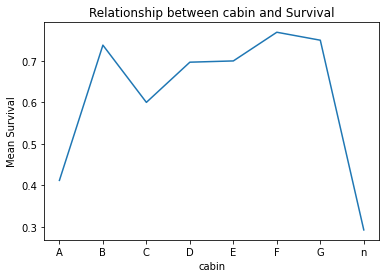

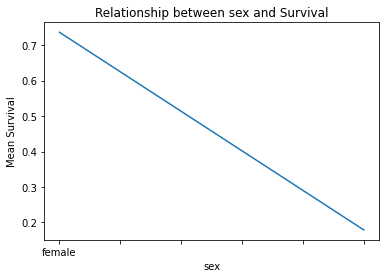

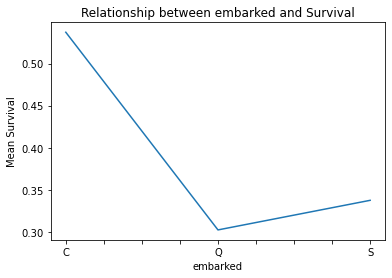

In [162]:
for var in ['cabin', 'sex', 'embarked']:
    fig = plt.figure()
    fig = X_train.groupby([var])['survived'].mean().plot()
    fig.set_title('Relationship between {} and Survival'.format(var))
    fig.set_ylabel('Mean Survival')
    plt.show()

The **relationship between the target and cabin and embarked** goes up and down, depending on the category.

## Weight of Evidence with pandas

**Pandas is quick and returns pandas dataframe!** But it does not preserve information from train data to propagate to test data! We need to store the mappings separately if planning to use the model in production.

Calculate first **total passengers who did not survive**! **Flag them!** Then calculate the **% of passengers who did not survive per category of cabin**!

In [163]:
total_non_survived = len(X_train) - X_train['survived'].sum()
X_train['non_survived'] = np.where(X_train['survived'] == 1, 0, 1)
non_survived = X_train.groupby(
    ['cabin'])['non_survived'].sum() / total_non_survived
non_survived

cabin
A    0.017513
B    0.019264
C    0.049037
D    0.017513
E    0.015762
F    0.005254
G    0.001751
n    0.873905
Name: non_survived, dtype: float64

**Combine (concatenate) those 2 series in a dataframe and calculate the WoE (Weight of Evidence)!**

In [164]:
data['non_survived']= data['survived'].replace({0: 1, 1: 0})

In [165]:
prob_df = pd.concat(data['survived'], data['non_survived'], axis=1)
prob_df['woe'] = np.log(prob_df['survived']/prob_df['non_survived'])
prob_df

C:\Users\husey\AppData\Local\Temp/ipykernel_15016/4002139606.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  prob_df = pd.concat(data['survived'], data['non_survived'], axis=1)


TypeError: concat() got multiple values for argument 'axis'

In [166]:
ordered_labels = prob_df['woe'].to_dict()
ordered_labels

{0: inf,
 1: inf,
 2: -inf,
 3: -inf,
 4: -inf,
 5: inf,
 6: inf,
 7: -inf,
 8: inf,
 9: -inf,
 10: -inf,
 11: inf,
 12: inf,
 13: inf,
 14: inf,
 15: -inf,
 16: -inf,
 17: inf,
 18: inf,
 19: -inf,
 20: inf,
 21: inf,
 22: inf,
 23: inf,
 24: inf,
 25: -inf,
 26: inf,
 27: inf,
 28: inf,
 29: inf,
 31: inf,
 32: inf,
 33: inf,
 34: -inf,
 35: inf,
 36: inf,
 37: inf,
 38: -inf,
 39: -inf,
 40: -inf,
 41: inf,
 42: inf,
 43: inf,
 44: inf,
 45: -inf,
 46: -inf,
 47: inf,
 48: inf,
 49: inf,
 50: inf,
 51: -inf,
 52: -inf,
 53: -inf,
 54: inf,
 55: inf,
 56: inf,
 57: inf,
 58: -inf,
 59: inf,
 60: -inf,
 61: inf,
 62: -inf,
 63: inf,
 64: inf,
 65: inf,
 66: inf,
 67: inf,
 68: inf,
 69: inf,
 70: -inf,
 71: -inf,
 72: inf,
 73: inf,
 74: -inf,
 75: -inf,
 76: inf,
 77: -inf,
 78: inf,
 79: inf,
 80: -inf,
 81: -inf,
 82: inf,
 83: inf,
 84: -inf,
 85: inf,
 86: inf,
 87: inf,
 88: inf,
 89: -inf,
 90: inf,
 91: inf,
 92: inf,
 93: inf,
 94: inf,
 95: inf,
 96: -inf,
 97: inf,
 98: inf

**Capture the woe in a dictionary!**

In [167]:
X_train['cabin'] = X_train['cabin'].map(ordered_labels)
X_test['cabin'] = X_test['cabin'].map(ordered_labels)

**Replace the labels with the woe!**

In [168]:
def find_category_mappings(df, variable, target):
    tmp = df.copy()  # copy of the original dataframe
    total_pos = df[target].sum() # total positive class
    total_neg = len(df) - df[target].sum() # total negative class
    tmp['non-target'] = 1 - tmp[target] # non target
    pos_perc = tmp.groupby([variable])[target].sum() / total_pos  # % of positive class
    neg_perc = tmp.groupby([variable])['non-target'].sum() / total_neg  # % of negative clas
    prob_tmp = pd.concat([pos_perc, neg_perc], axis=1)  # Concatenate
    prob_tmp['woe'] = np.log(prob_tmp[target]/prob_tmp['non-target']) # WoE
    return prob_tmp['woe'].to_dict()
def integer_encode(train, test, variable, ordinal_mapping):
    train[variable] = train[variable].map(ordinal_mapping)
    test[variable] = test[variable].map(ordinal_mapping)

**Explore the result!**

In [169]:
for variable in ['sex', 'embarked']:
    mappings = find_category_mappings(X_train, variable, 'survived')
    integer_encode(X_train, X_test, variable, mappings)

**Turn the previous commands into 2 functions!**

In [170]:
X_train.head()

,cabin,sex,embarked,survived,non_survived
843,NaN,-1.013111,-0.164796,0,1
869,NaN,-1.013111,-0.164796,0,1
430,NaN,1.535068,-0.164796,1,0
481,NaN,1.535068,0.658871,1,0
1308,NaN,-1.013111,-0.164796,0,1


**A loop over the remaining categorical variables!**

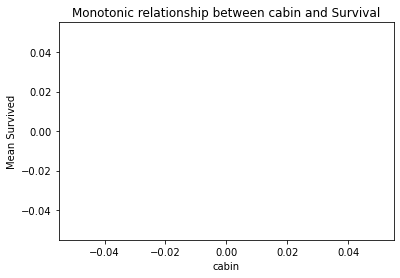

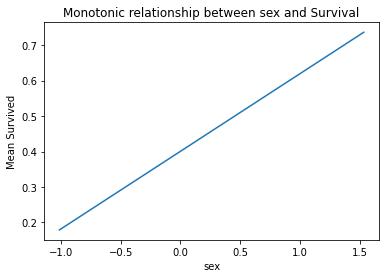

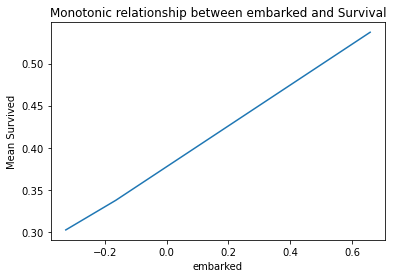

In [171]:
for var in ['cabin', 'sex', 'embarked']:
    fig = plt.figure()
    fig = X_train.groupby([var])['survived'].mean().plot()
    fig.set_title('Monotonic relationship between {} and Survival'.format(var))
    fig.set_ylabel('Mean Survived')
    plt.show()

**Check the result!**

Note the monotonic relationships between the mean target and the categories. In the train set.

Inspect the created **monotonic relationship between the categorical variables and the target!**

**M**

**Now in the test set!**

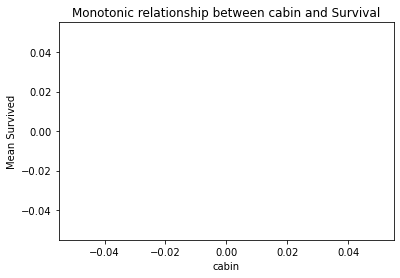

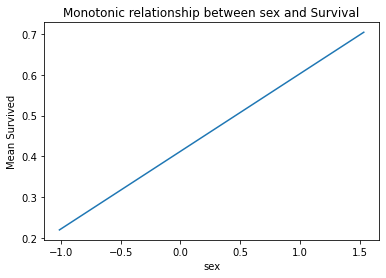

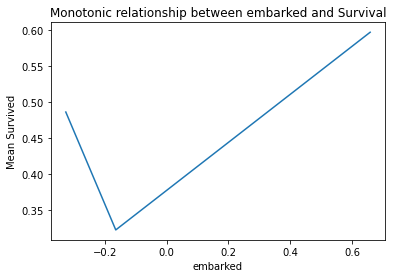

In [172]:
for var in ['cabin', 'sex', 'embarked']:
    fig = plt.figure()
    fig = X_test.groupby([var])['survived'].mean().plot()
    fig.set_title('Monotonic relationship between {} and Survival'.format(var))
    fig.set_ylabel('Mean Survived')
    plt.show()

The monotonic relationship does not hold when encoding the **categorical variables in the test set**. This could mean that **the categories are not informative of the target** or the proportion of survivors is not homogeneous between in the categories in the train and test sets. In situations like this, we could try **grouping rare labels into a joint category** as we will cover later in this section, before applying the Weight of evidence transformation. **Note:** Replacing categorical labels with this code and method will generate missing values for categories present in the test set that were not seen in the training set. Therefore it is extremely important to **handle rare labels** before-hand. It will be explained later! **In addition, it will create NA or Inf if any of the 2 terms in the ratio of the WoE formula are 0**

## Weight of Evidence with Feature-Engine



In [173]:
X_train, X_test, y_train, y_test = train_test_split(
    data[['cabin', 'sex', 'embarked']],  # predictors
    data['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility
X_train.shape, X_test.shape

((914, 3), (392, 3))

In [174]:
woe_enc = fe_WoEEncoder(variables=['cabin', 'sex', 'embarked'])

**When fitting the transformer, we need to pass the target as well just like with any Scikit-learn predictor class!**

In [175]:
woe_enc.fit(X_train, y_train)

WoEEncoder(variables=['cabin', 'sex', 'embarked'])

**In the encoder dict we see the woe for each category for each of the selected variables!**

In [176]:
woe_enc.encoder_dict_

{'cabin': {'A': 0.1529838185513379,
  'B': 1.545750694176846,
  'C': 0.9151238705982346,
  'D': 1.3425678854251744,
  'E': 1.356956622877274,
  'F': 1.7136315668160063,
  'G': 1.60827105115818,
  'n': -0.37507116447186734},
 'sex': {'female': 1.535067647134885, 'male': -1.0131107672983564},
 'embarked': {'C': 0.658871160676746,
  'Q': -0.3265892617105483,
  'S': -0.16479628505772237}}

**The list of variables that the encoder will transform!**

In [177]:
woe_enc.variables_

['cabin', 'sex', 'embarked']

**Explore the result!**

In [178]:
X_train = woe_enc.transform(X_train)
X_test = woe_enc.transform(X_test)
X_train.head()

,cabin,sex,embarked
843,-0.375071,-1.013111,-0.164796
869,-0.375071,-1.013111,-0.164796
430,-0.375071,1.535068,-0.164796
481,-0.375071,1.535068,0.658871
1308,-0.375071,-1.013111,-0.164796


**Note**

If the **argument variables is left to None**, then the encoder will **automatically identify all categorical variables.** The encoder will **not encode numerical variables.** So if some of your numerical variables are in fact categories, you will need to re-cast them as object before using the encoder. If **there is a label in the test set that was not present in the train set**, the encoder will **through and error**, to alert you of this behaviour. **Finally**, if any of the terms in the weight of evidence calculation is 0, the log of 0 is not defined, so this transformer will raise an error.

## Weight of Evidence with Category Encoders

If using Category encpders, instead of pandas, we do not need to keep the target variable in the training dataset.

In [179]:
X_train, X_test, y_train, y_test = train_test_split(
    data[['cabin', 'sex', 'embarked']],  # predictors
    data['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility
X_train.shape, X_test.shape

((914, 3), (392, 3))

In [180]:
woe_enc = WOEEncoder(cols=['cabin', 'sex', 'embarked'])

In [181]:
woe_enc.fit(X_train, y_train)

WOEEncoder(cols=['cabin', 'sex', 'embarked'])

**The mappings in category encoders are not so easy to interpret!**

In [182]:
woe_enc.mapping

{'cabin': cabin
  1   -0.374548
  2    1.287500
  3    1.295799
  4    0.901246
  5    1.518942
  6    0.188888
  7    1.488171
  8    1.200488
 -1    0.000000
 -2    0.000000
 dtype: float64,
 'sex': sex
  1   -1.008094
  2    1.525265
 -1    0.000000
 -2    0.000000
 dtype: float64,
 'embarked': embarked
  1   -0.164851
  2    0.654977
  3   -0.307696
 -1    0.000000
 -2    0.000000
 dtype: float64}

**Explore the result!**

In [183]:
X_train = woe_enc.transform(X_train)
X_test = woe_enc.transform(X_test)
X_train.head()

,cabin,sex,embarked
843,-0.374548,-1.008094,-0.164851
869,-0.374548,-1.008094,-0.164851
430,-0.374548,1.525265,-0.164851
481,-0.374548,1.525265,0.654977
1308,-0.374548,-1.008094,-0.164851
